In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("breast_cancer.csv")

In [3]:
df.head(10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [4]:
del df['Unnamed: 32']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
#The 'diagnosis' column is taken as the independent variable y and the rest are taken as X
X = df.iloc[:, 2:].values
y = df.iloc[:, 1].values

In [8]:
# Finding the number of malignant diagnosis in the data
df['diagnosis'].value_counts()['M']

212

In [9]:
# Finding the number of benign diagnosis in the data
df['diagnosis'].value_counts()['B']

357

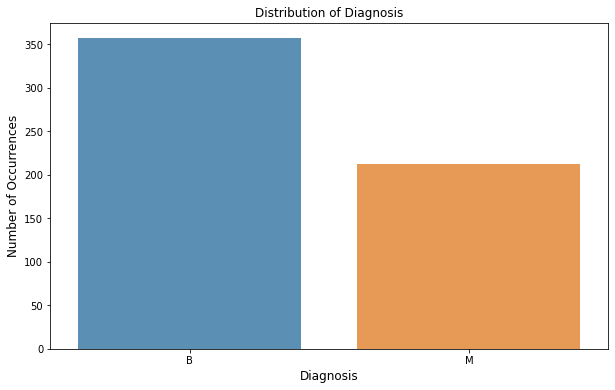

In [34]:
# Count the occurrences of each class in the 'diagnosis' column
diag_cnt = df['diagnosis'].value_counts()
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=diag_cnt.index, y=diag_cnt.values, alpha=0.8)

plt.title('Distribution of Diagnosis')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Diagnosis', fontsize=12)
plt.show()

In [10]:
# Encoding categorical data(for y)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [11]:
# Splitting the dataset into the Training set and Test set 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [12]:
# Performing feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
# Importing necessary libraries
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

In [15]:
# Adding an input layer 
model.add(Dense(12, activation='relu', input_shape=(30,)))

In [16]:
# Adding a hidden layer 
model.add(Dense(8, activation='relu'))

In [17]:
# Adding an output layer 
model.add(Dense(1, activation='sigmoid'))

In [18]:
# Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
# Training the model
model.fit(X_train, y_train,epochs=100,batch_size=32, verbose=1)

Epoch 1/100
15/15 [==============================] - 1s 1ms/step - loss: 0.8517 - accuracy: 0.2769
Epoch 2/100
15/15 [==============================] - 0s 1ms/step - loss: 0.6417 - accuracy: 0.5824
Epoch 3/100
15/15 [==============================] - 0s 1ms/step - loss: 0.4908 - accuracy: 0.7824
Epoch 4/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3925 - accuracy: 0.8857
Epoch 5/100
15/15 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.9319
Epoch 6/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2687 - accuracy: 0.9473
Epoch 7/100
15/15 [==============================] - 0s 1ms/step - loss: 0.2256 - accuracy: 0.9473
Epoch 8/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1920 - accuracy: 0.9516
Epoch 9/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1668 - accuracy: 0.9582
Epoch 10/100
15/15 [==============================] - 0s 1ms/step - loss: 0.1488 - accuracy: 0.9604
Epoch 11/

In [20]:
# Evaluating the model
score = model.evaluate(X_test, y_test,verbose=1)

4/4 [==============================] - 0s 1ms/step - loss: 0.0906 - accuracy: 0.9737


In [21]:
print(score)

[0.09063844382762909, 0.9736841917037964]


In [22]:
# Predicting the test set results
from sklearn.metrics import confusion_matrix, roc_curve, auc
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

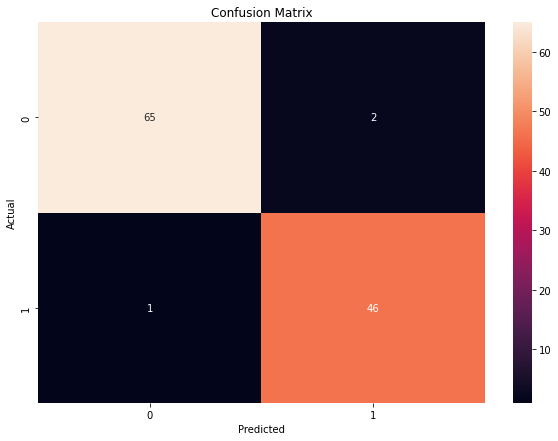

In [24]:
# Creating a confusion matrix with the test results and visualizing it
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [25]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

In [29]:
roc_auc

0.9744363289933312

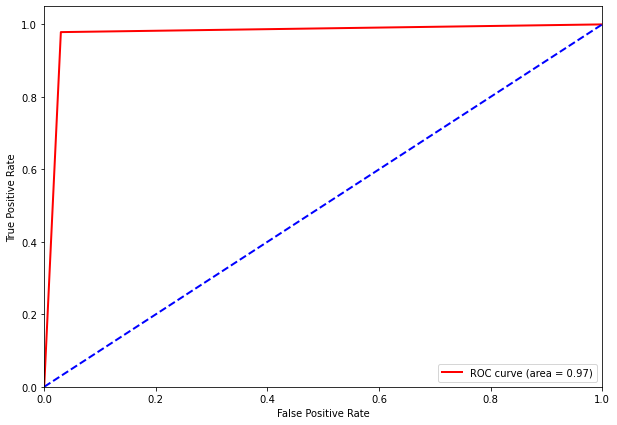

In [32]:
# Plotting an ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr, tpr, color='red', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()